In [1]:
%run algotithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time
import itertools

In [140]:
def test_graph(num_of_nodes,
               edge_existence_prob = 0.3,
               num_iters=30,
               sa_iters=10,
               elitism_size=2,
               mutation_prob=0.1,
               population_size=15,
               tournament_size=3):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)

    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")

    start_time = time.time()
    initial_fitness, best_solution = ga(G, num_iters, sa_iters, elitism_size, mutation_prob, population_size, tournament_size)
    end_time = time.time()

    print("Initial number of leaves:", initial_fitness)
    print("Number of leaves:", best_solution.fitness)
    print(f"Execution time: {timedelta(seconds=end_time-start_time)}")
    
    
    MLST = Graph()
    MLST.add_edges_from(best_solution.edges)
    
    node_colors = []
    for node in MLST.nodes():
        if MLST.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(MLST, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()




Testing a graph of 10 nodes and 16 edges...

Initial number of leaves: 5
Number of leaves: 7
Execution time: 0:00:00.244901


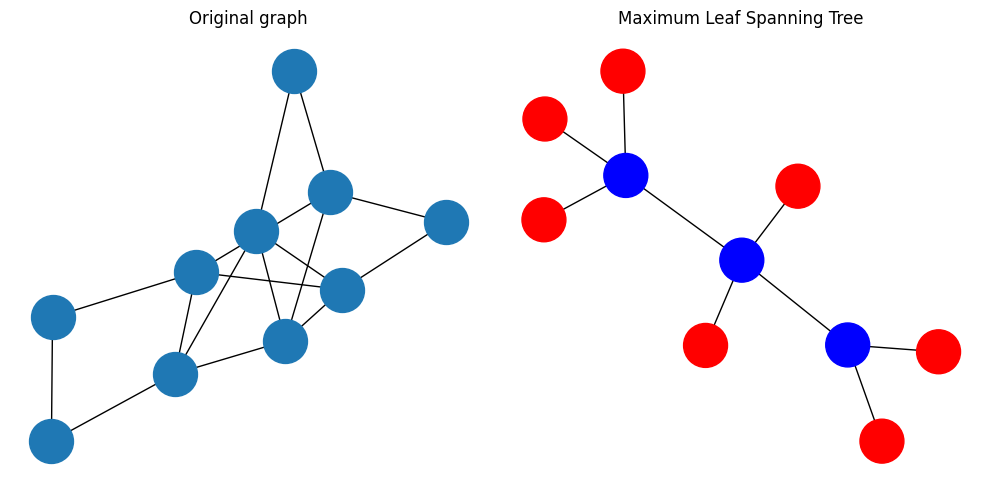

In [144]:
#print(minimum_spanning_tree(nx.erdos_renyi_graph(10, 0.7, seed=123)).edges)
test_graph(10, 0.3, 10, 10, 2, 0.1, 10, 10)



Testing a graph of 10 nodes and 11 edges...

Initial number of leaves: 4
Number of leaves: 4
Execution time: 0:00:02.374295


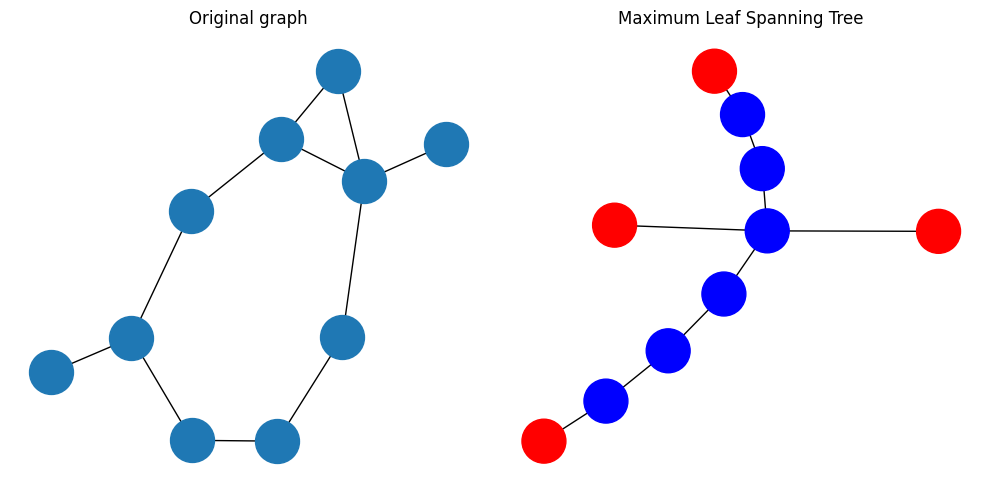

In [145]:
test_graph(10, 0.2, 10, 20, 5, 0.2, 50, 10)



Testing a graph of 50 nodes and 855 edges...

Initial number of leaves: 46
Number of leaves: 46
Execution time: 0:00:07.210446


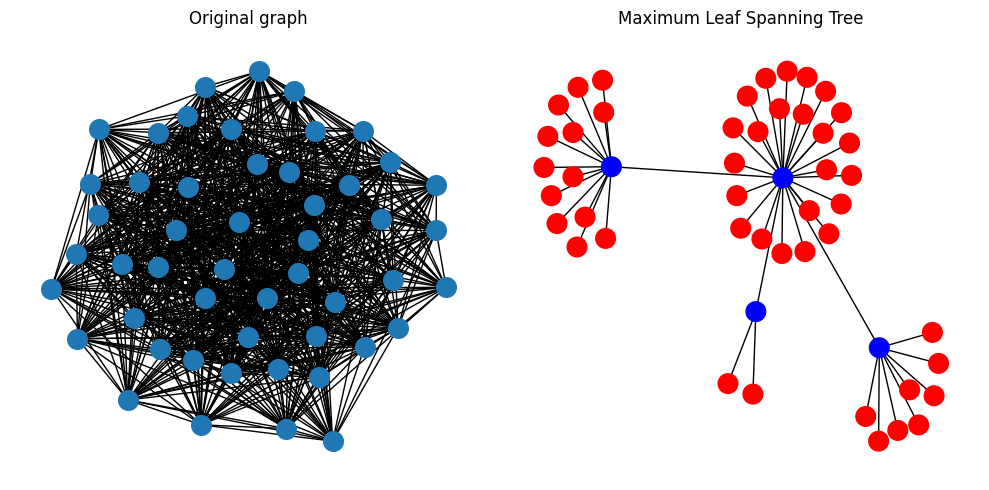

In [146]:
test_graph(50, 0.7, 10, 15, 2, 0.2, 30, 10)